# Shp2 Growth Factor Signal Transduction Specific Visualization

In [1]:
import os
os.chdir("../")

In [2]:
import glob
import gzip
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from modelproblem import ModelProblem
from petab.visualize import plot_problem
from weighted_quantile import weighted_quantile
from result_classes import Result,MethodResults

In [3]:
prob_name = "Shp2"
methods = ["ptmcmc", "smc", "pmc"]
colors = sns.color_palette("tab10", n_colors=len(methods))

mod_prob = ModelProblem(prob_name)
mod_prob.initialize()

grouped_results = [MethodResults(x) for x in methods]

for method, group_obj in zip(methods, grouped_results):
	result_dir = f"results/{prob_name}/{method}/"
	fnames = glob.glob(result_dir + "*.pkl")
	for fname in fnames:
		with gzip.open(fname, "rb") as f:
			results = pickle.load(f)
		result_obj = Result(results)
		group_obj.add_result(result_obj)	

Text(0, 0.5, 'Sampling Quality')

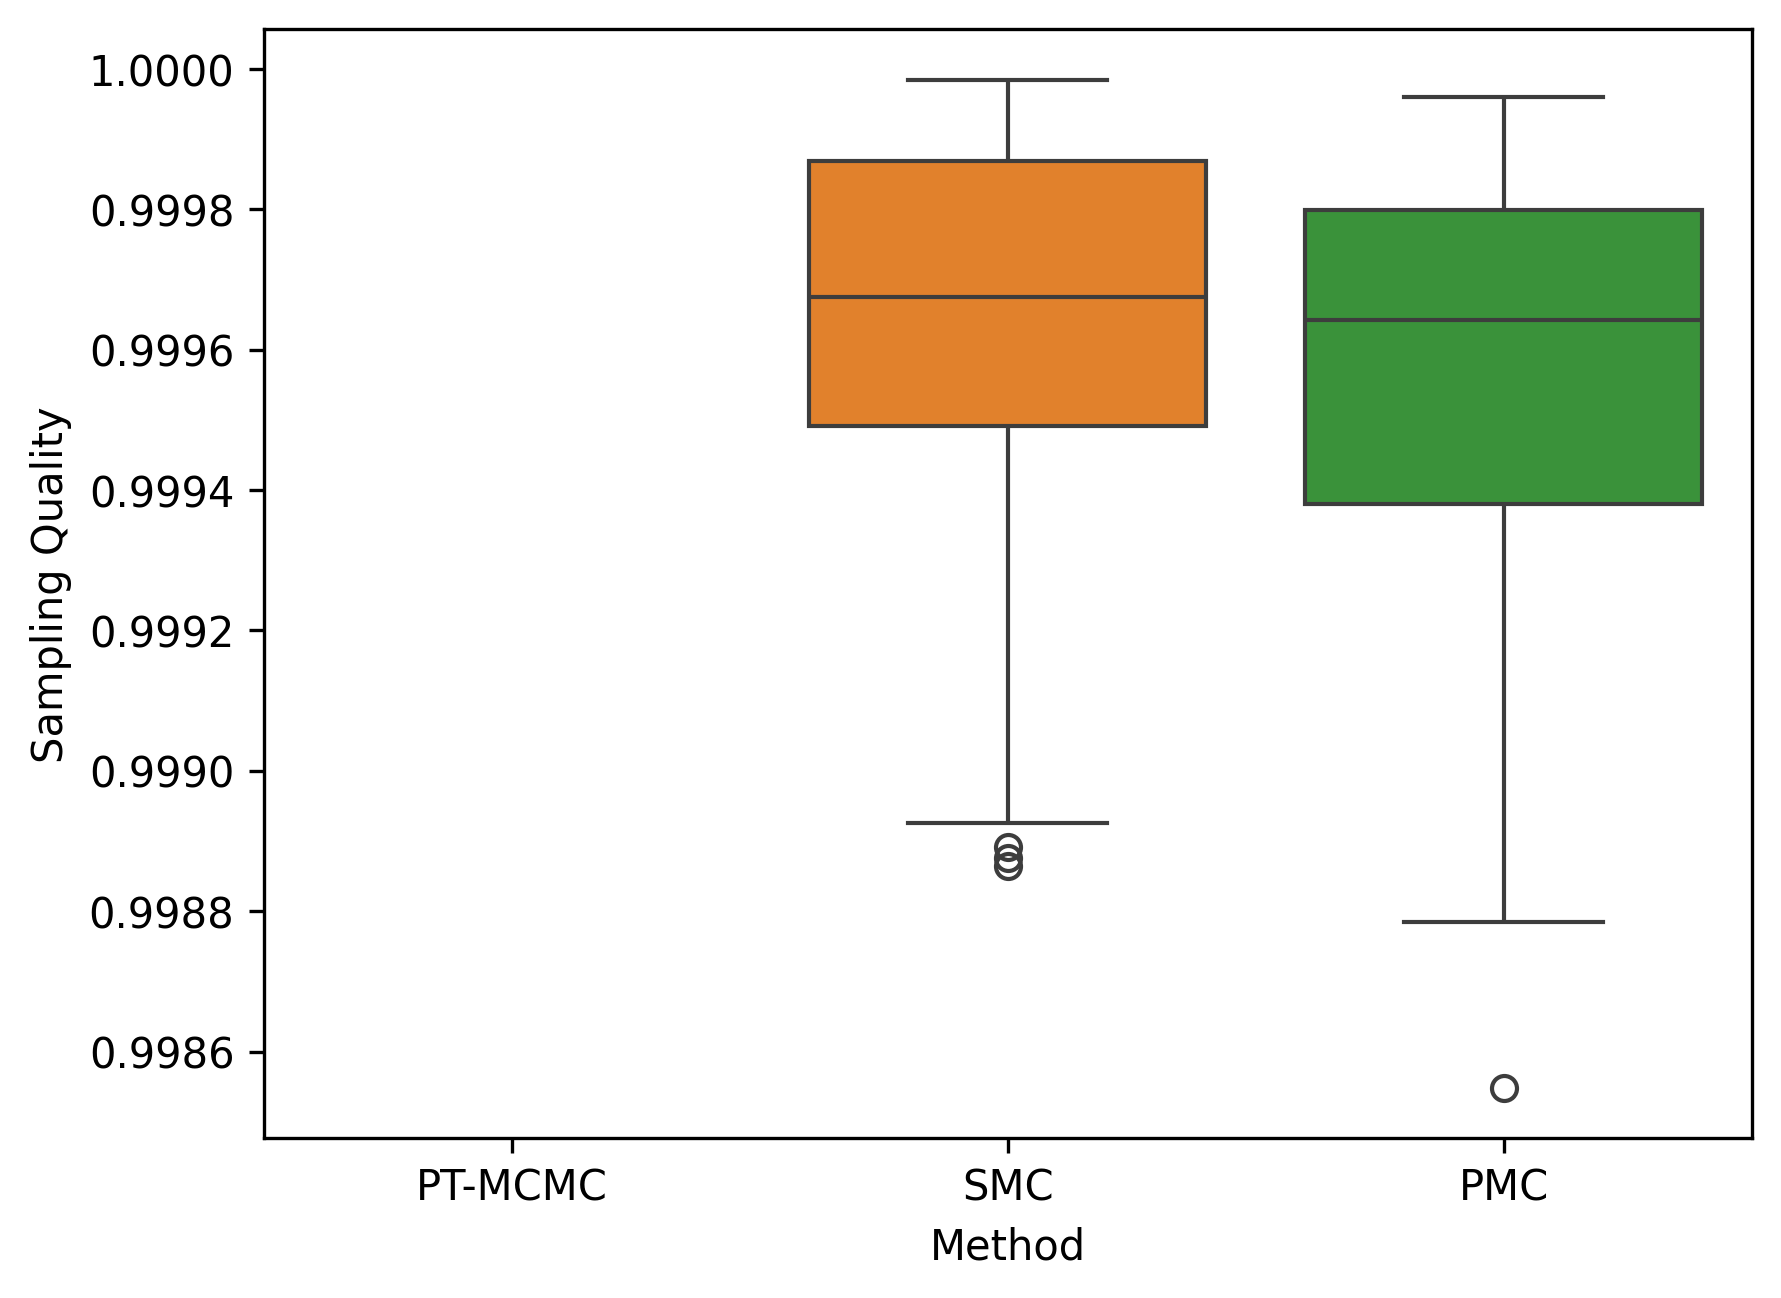

In [4]:
fixed_idxs = mod_prob.problem.x_fixed_indices
par_names = mod_prob.problem.x_names
x=np.array(par_names)
mask=np.full(len(par_names),True,dtype=bool)
mask[fixed_idxs]=False
fit_par_names=x[mask]

dummy_idx = -1

par_bounds = mod_prob.bounds
plt.figure(dpi=300)
ratios = np.array([x.get_sampling_efficiency(par_bounds, dummy_idx) for x in grouped_results], dtype=object)
ratio_df = pd.DataFrame()
for ratio_arr, method in zip(ratios, methods):
	temp_df = pd.DataFrame()
	temp_df[method] = ratio_arr
	ratio_df = pd.concat([ratio_df, temp_df])

sns.boxplot(ratio_df, showfliers=True)
plt.xticks(range(len(methods)), [x.abbr for x in grouped_results])
plt.xlabel("Method"); plt.ylabel(f"Sampling Quality")

## Select best result for each method

In [5]:
llhs = np.array([x.get_avg_llhs() for x in grouped_results])
best_runs = [np.argmax(x) for x in llhs]
best_results = [res.all_runs[best_idx] for best_idx, res in zip(best_runs, grouped_results)]

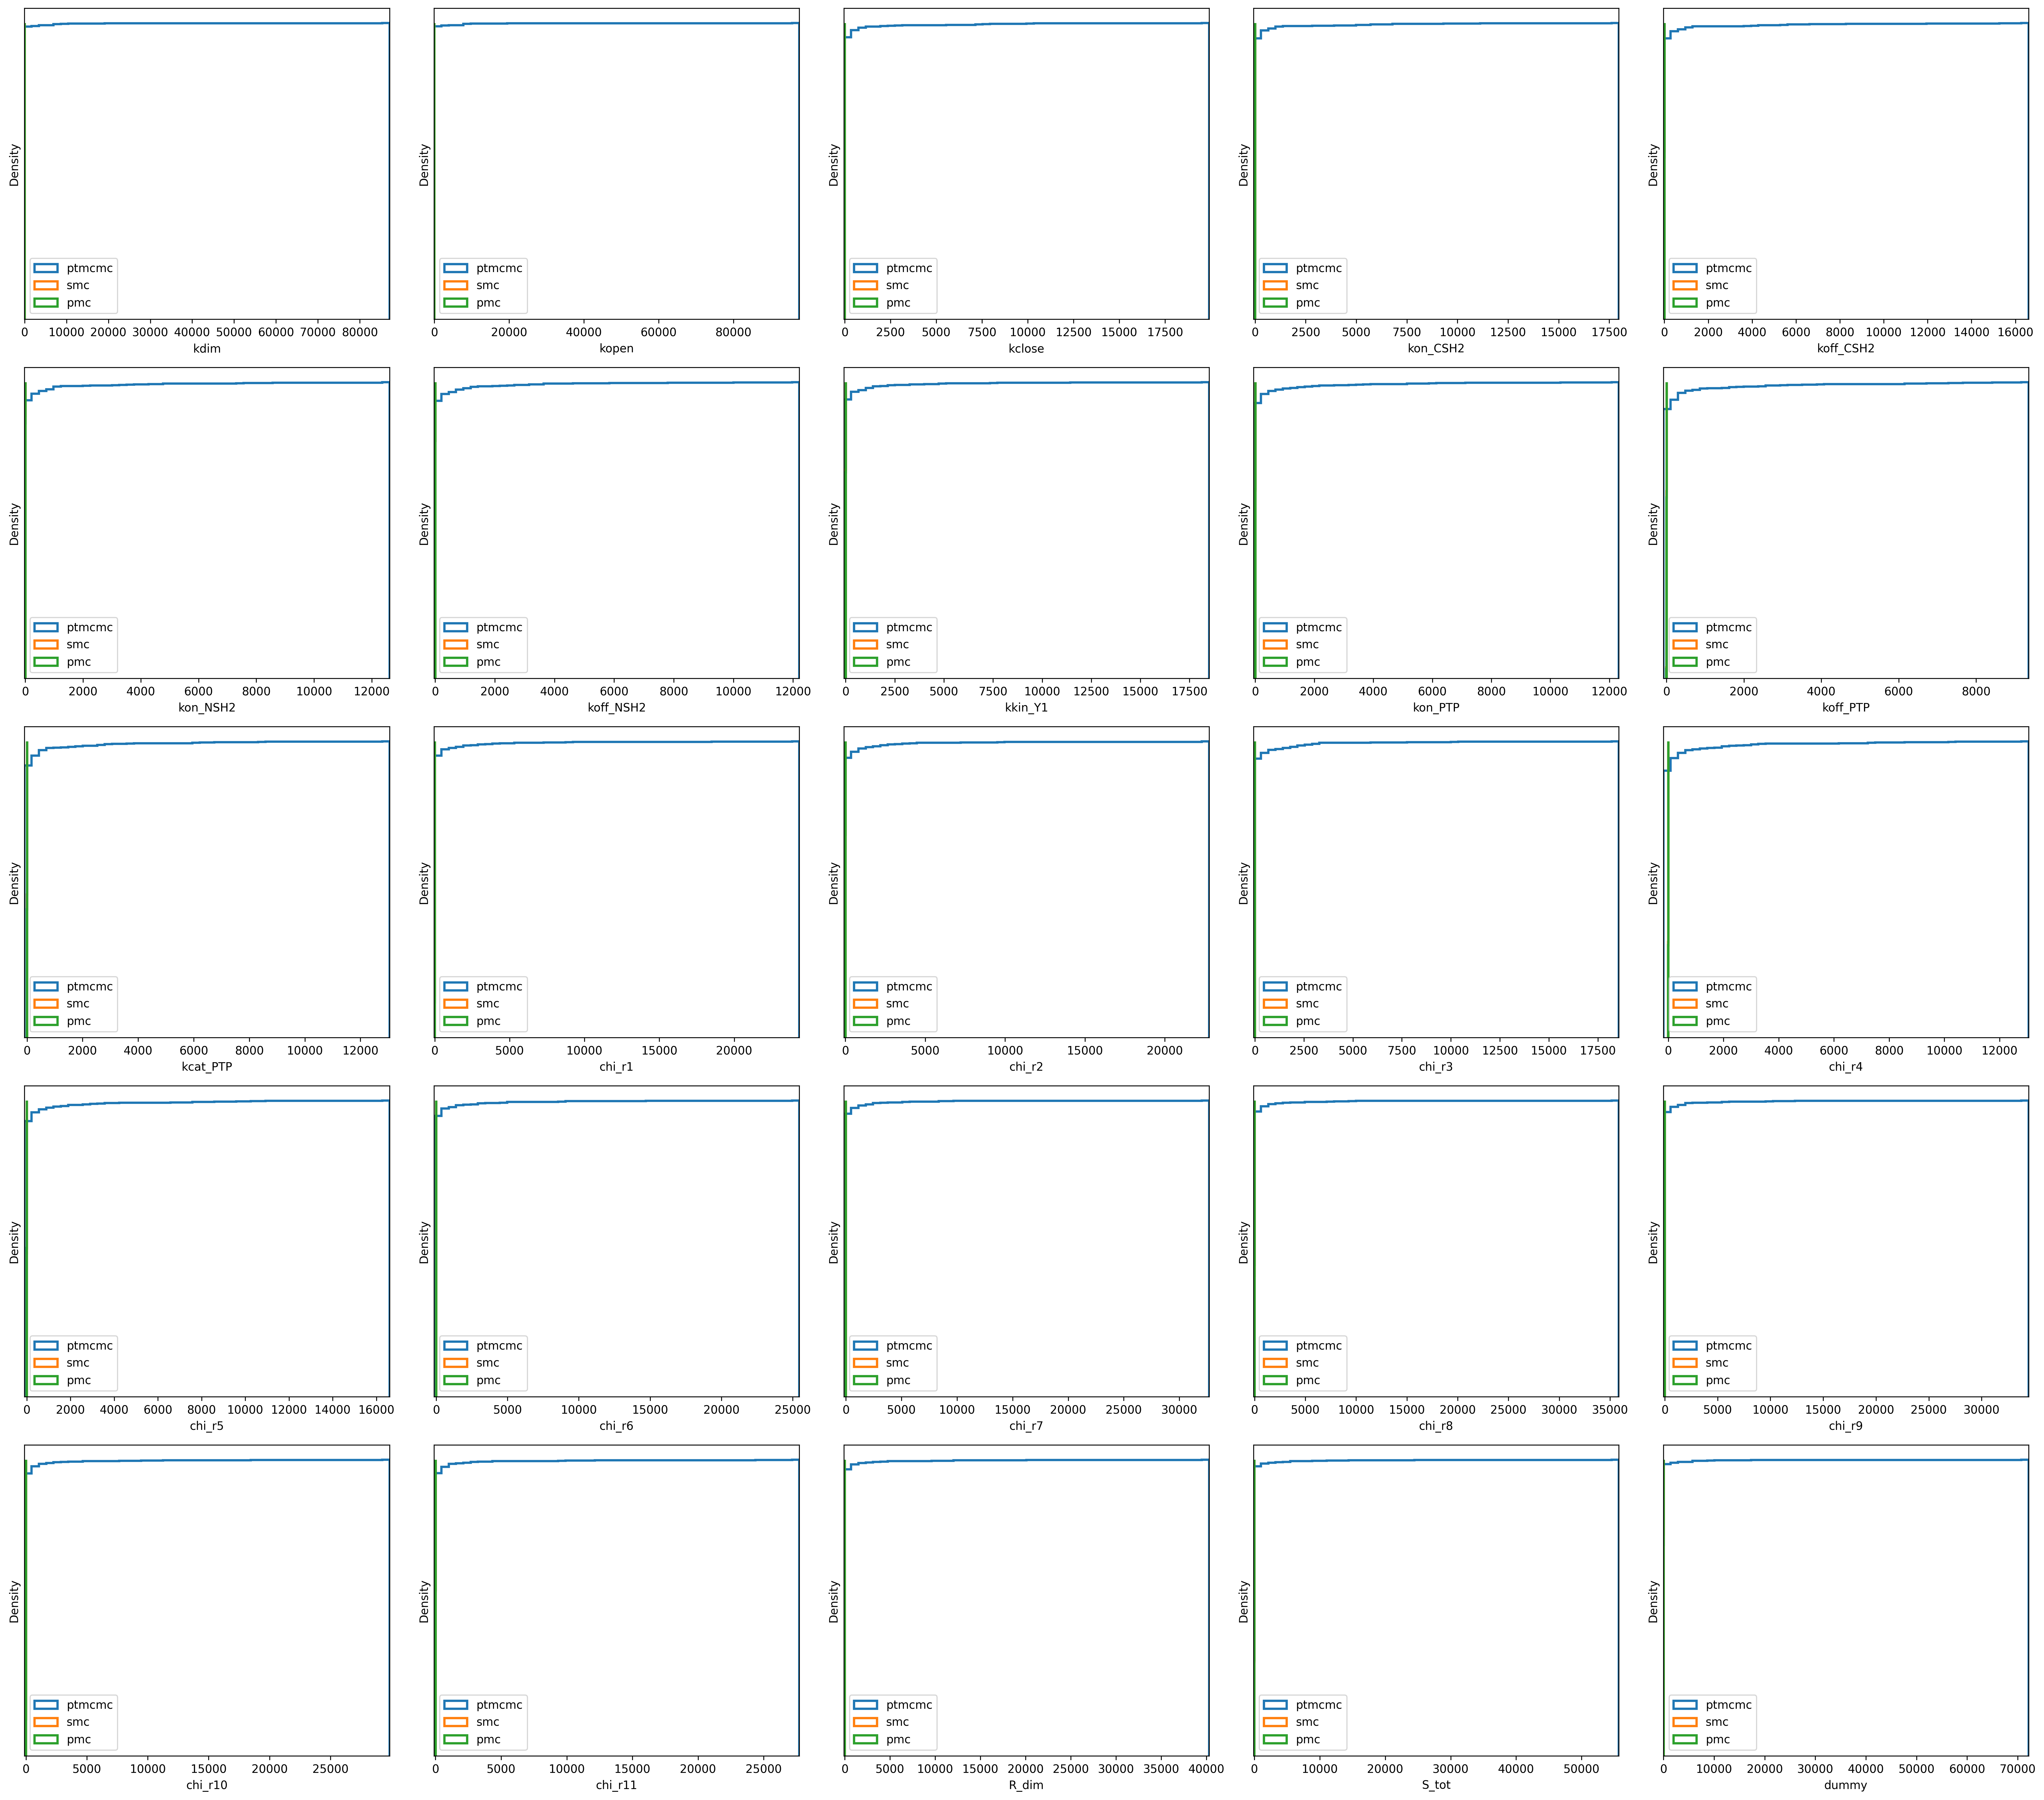

In [6]:
fixed_idxs = mod_prob.problem.x_fixed_indices
par_names = mod_prob.problem.x_names
x=np.array(par_names)
mask=np.full(len(par_names),True,dtype=bool)
mask[fixed_idxs]=False
fit_par_names=x[mask]

par_bounds = mod_prob.bounds
histtype = "step"
alpha=1

plt.figure(figsize=(25,22), dpi=300)
for i, par_name in enumerate(fit_par_names): 
	plt.subplot(5,5,i+1)
	for j in range(len(best_results)):      
		cur_result = best_results[j]
		norm_ws = cur_result.posterior_weights
		plt.hist(cur_result.posterior_samples[:, i], lw=2, weights=norm_ws, color=colors[j], alpha=alpha,
			 cumulative=True, histtype="step", bins=50, label=cur_result.method) 
		plt.xlabel(par_name)
		plt.yticks([])
		plt.ylabel("Density")
		plt.margins(x=0)
	plt.legend()
plt.tight_layout()

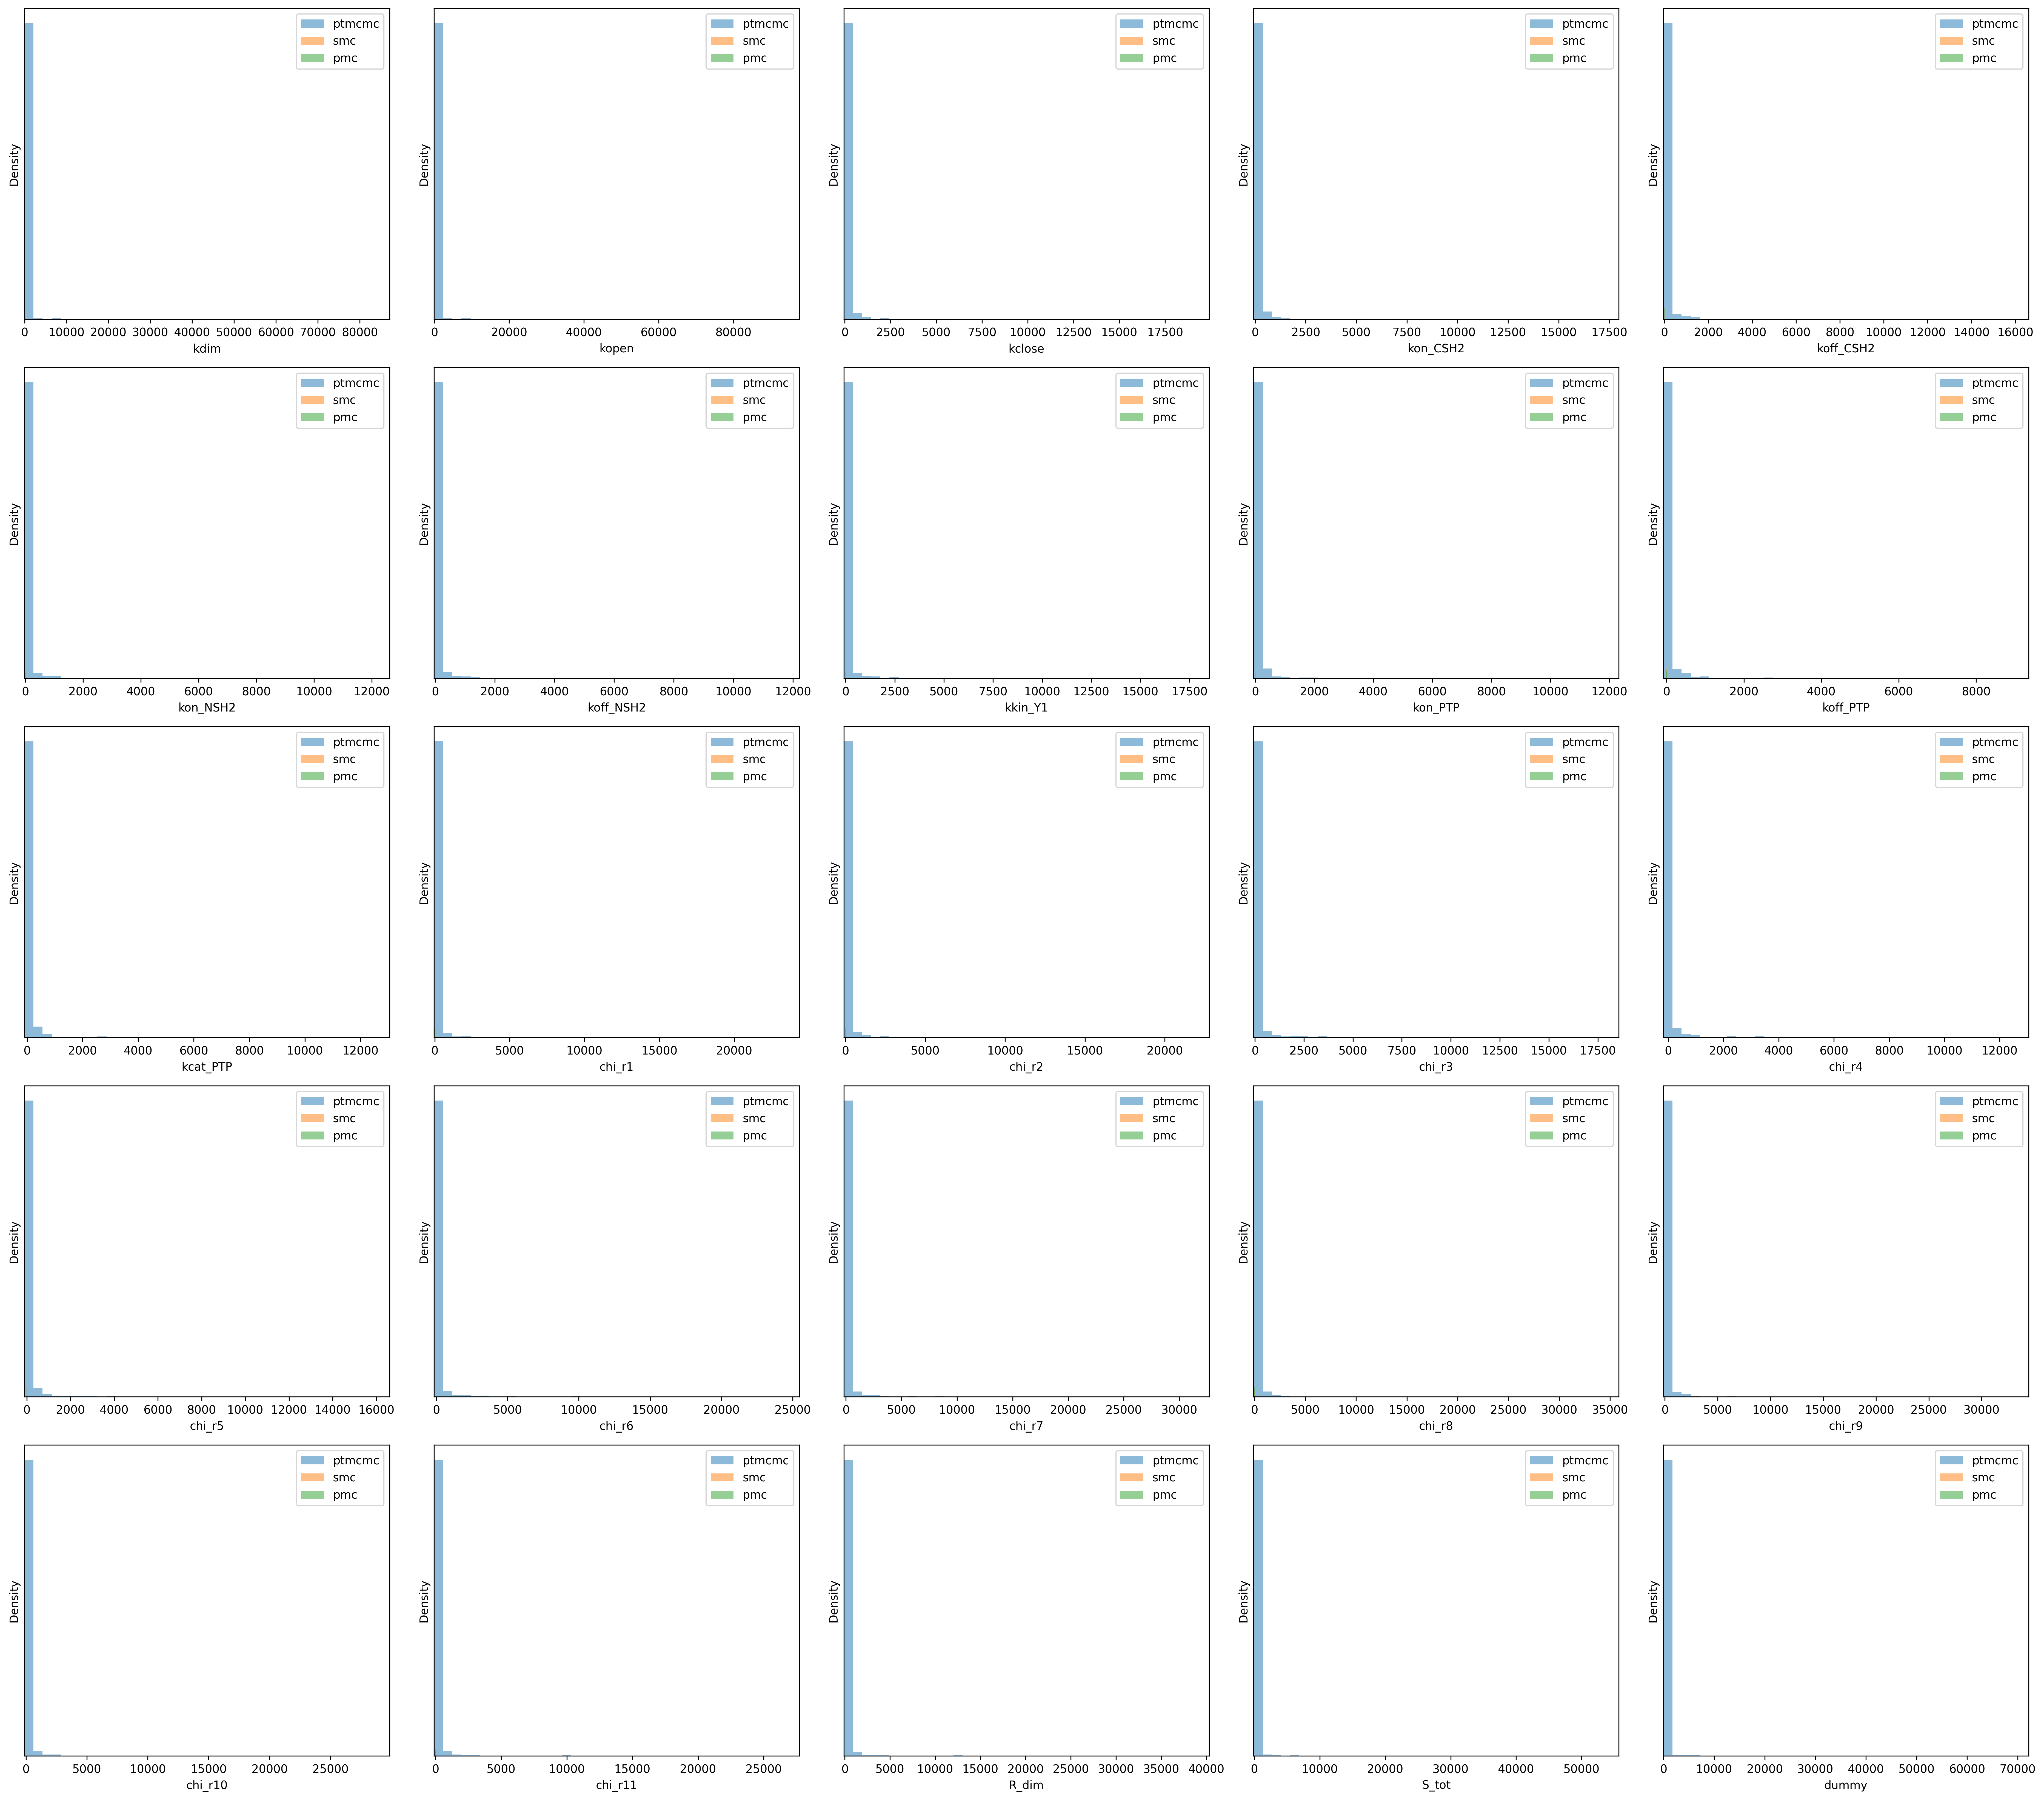

In [7]:
# Get the names of the estimated parameters
fixed_idxs = mod_prob.problem.x_fixed_indices
par_names = mod_prob.problem.x_names
x=np.array(par_names)
mask=np.full(len(par_names),True,dtype=bool)
mask[fixed_idxs]=False
fit_par_names=x[mask]

par_bounds = mod_prob.bounds
histtype = "bar"
alpha=0.5

plt.figure(figsize=(25,22), dpi=300)
for i, par_name in enumerate(fit_par_names): 
	plt.subplot(5,5,i+1)
	for j in range(len(best_results)):      
		cur_result = best_results[j]
		plt.hist(cur_result.posterior_samples[:, i], lw=2, weights=cur_result.posterior_weights, color=colors[j], alpha=alpha,
			 cumulative=False, histtype=histtype, bins=40, label=cur_result.method) 
		plt.xlabel(par_name)
		plt.yticks([])
		plt.ylabel("Density")
		plt.margins(x=0)
	plt.legend()
plt.tight_layout()

In [8]:
from pypesto.objective import AggregatedObjective
from pypesto.objective.roadrunner.road_runner import RoadRunnerObjective
obj = mod_prob.problem.objective
og_obj = obj
if isinstance(obj, AggregatedObjective):
    subobjs = mod_prob.problem.objective.__dict__["_objectives"]
    for subobj in subobjs:
        if isinstance(subobj, RoadRunnerObjective):
            obj = subobj
        else:
            continue

## Plot fits to model data

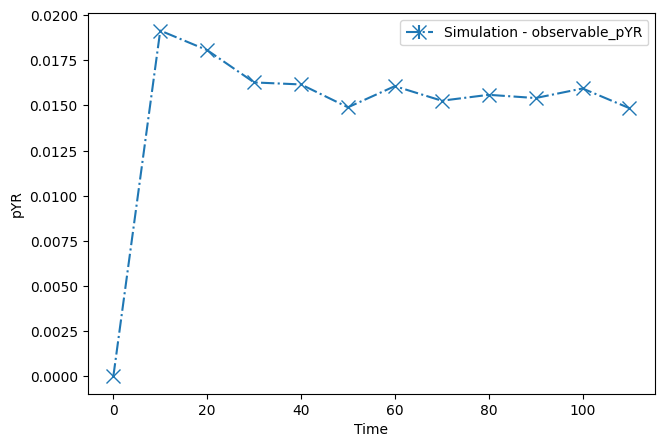

In [9]:
CI = 0.95
UPPER_PCT = (1 - (1-CI)/2)
LOWER_PCT = ((1-CI)/2)

petab_prob = mod_prob.petab_problem
ax_dict = plot_problem(petab_problem=petab_prob,) 
fig = plt.gcf()
# Change the figure size
fig.set_size_inches(6,4)

In [10]:
measure_df = petab_prob.measurement_df
measure_df

,observableId,simulationConditionId,measurement,time,datasetId
0,observable_pYR,simCondition,0.000000,0.0,simCondition_observable_pYR
1,observable_pYR,simCondition,0.019141,10.0,simCondition_observable_pYR
2,observable_pYR,simCondition,0.018059,20.0,simCondition_observable_pYR
3,observable_pYR,simCondition,0.016272,30.0,simCondition_observable_pYR
4,observable_pYR,simCondition,0.016160,40.0,simCondition_observable_pYR
5,observable_pYR,simCondition,0.014895,50.0,simCondition_observable_pYR
6,observable_pYR,simCondition,0.016065,60.0,simCondition_observable_pYR
7,observable_pYR,simCondition,0.015260,70.0,simCondition_observable_pYR
8,observable_pYR,simCondition,0.015586,80.0,simCondition_observable_pYR
9,observable_pYR,simCondition,0.015408,90.0,simCondition_observable_pYR


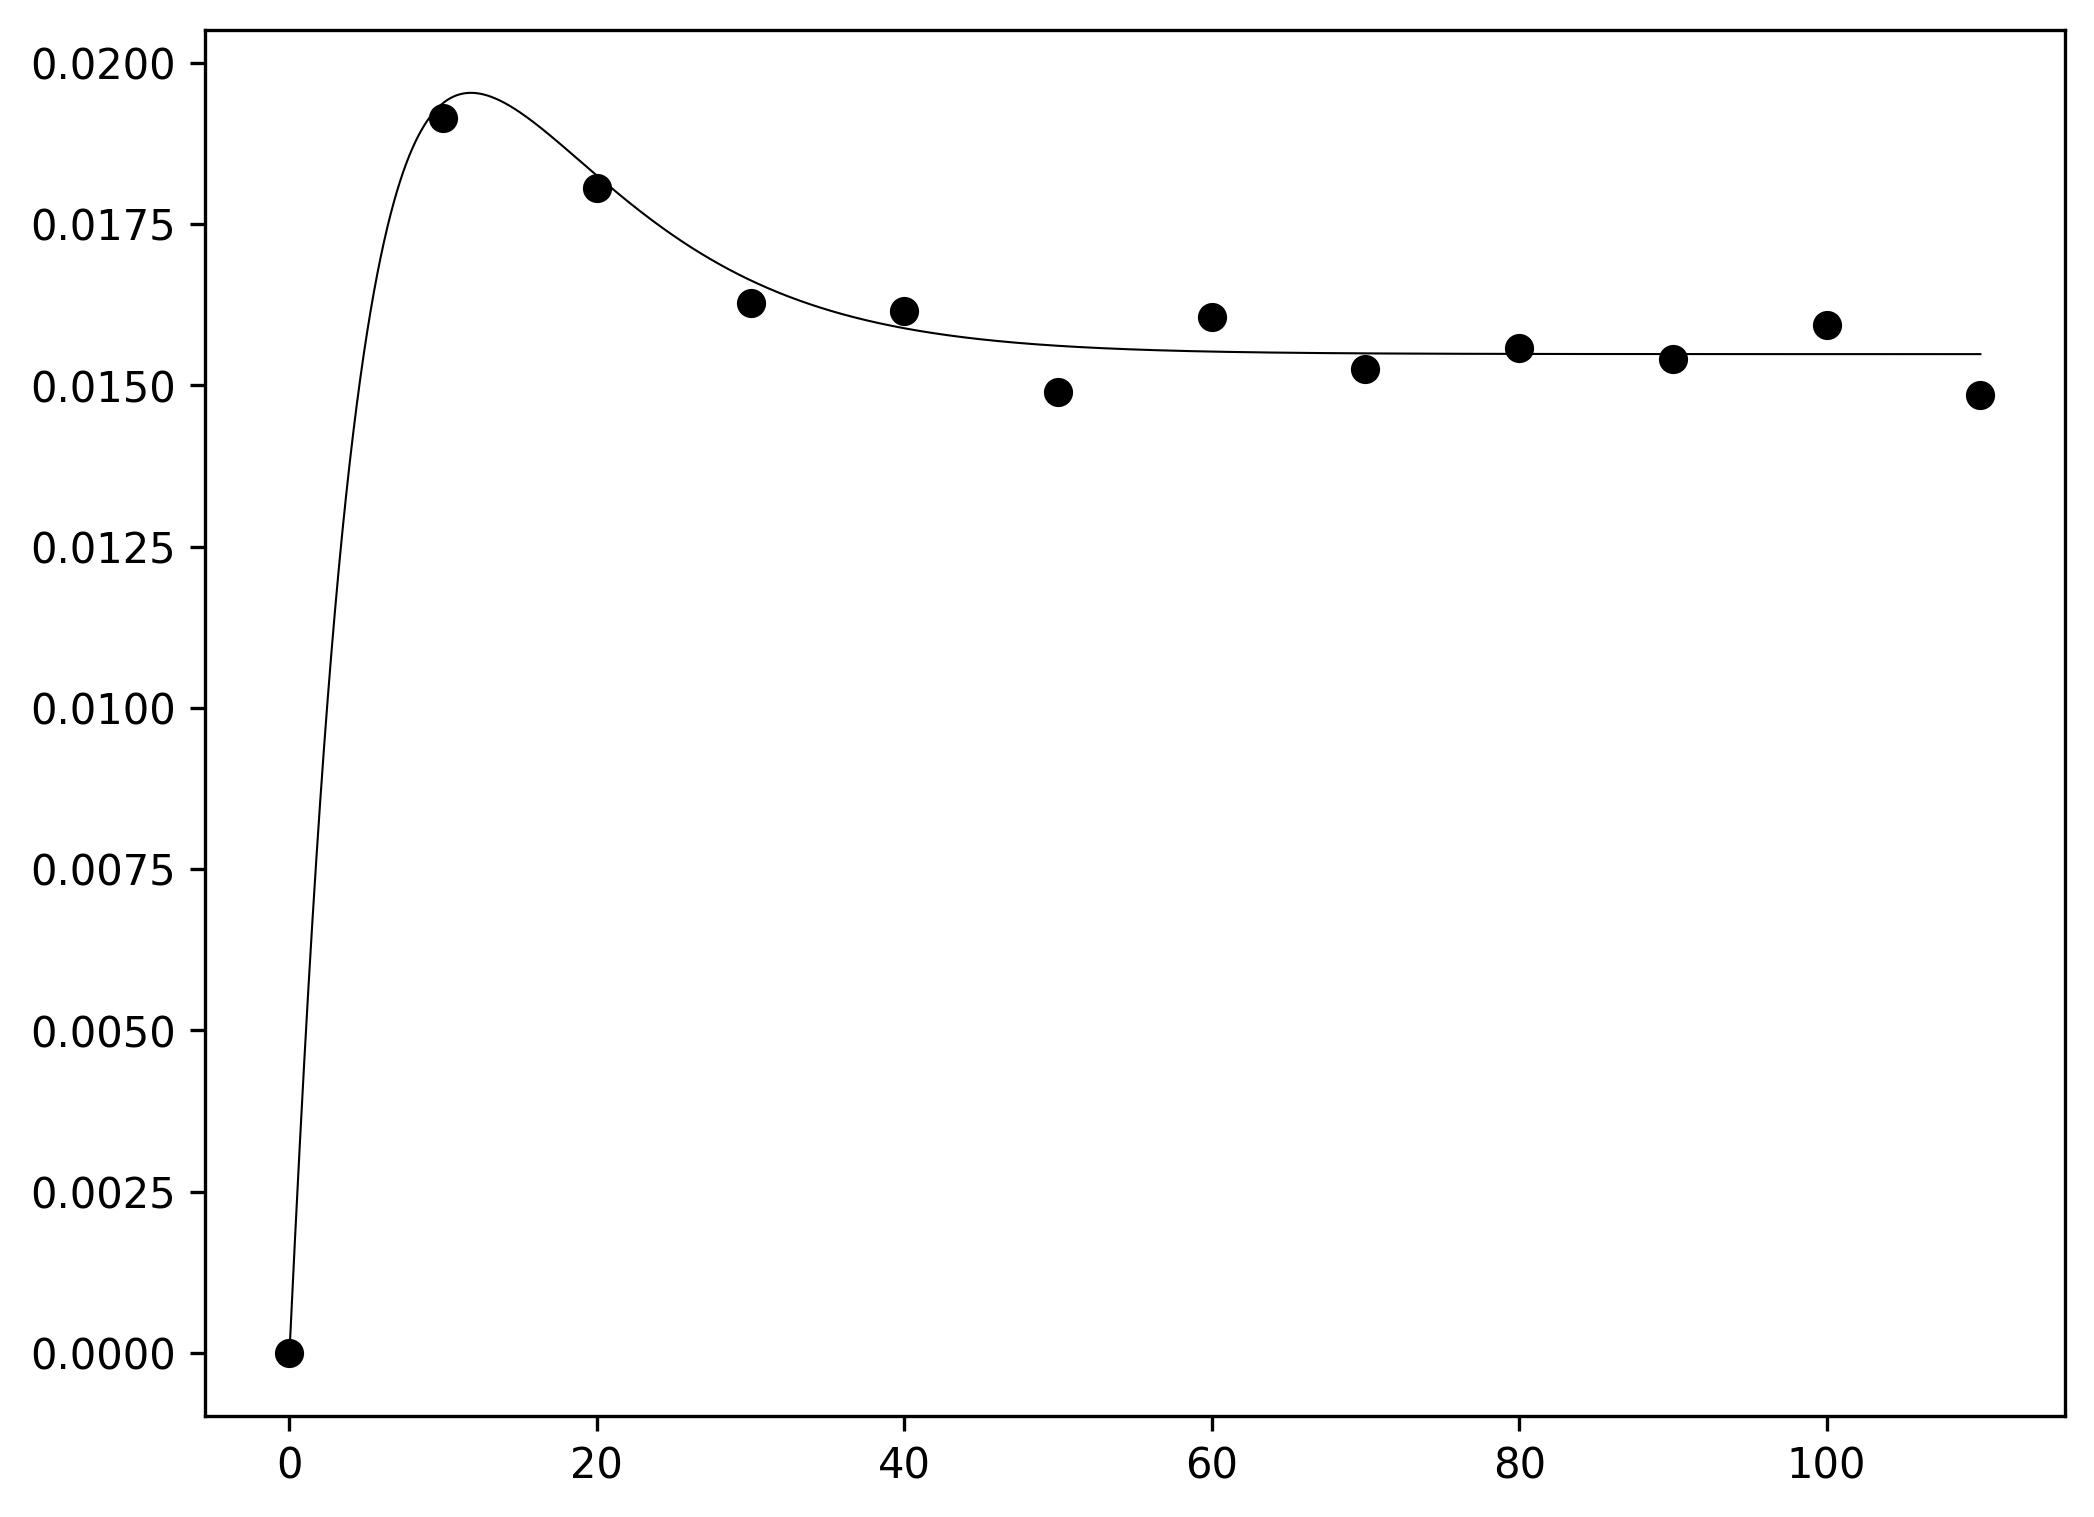

In [11]:
measure_df = petab_prob.measurement_df
plt.figure(figsize=(8,6), dpi=300)
plt.plot(measure_df["time"], measure_df["measurement"], "ko", label="Data", zorder=2)

max_t = np.max(measure_df["time"])
n_sim_ts = int(110*100 + 1)
simu = obj.roadrunner_instance

simu.resetAll()
simu.timeCourseSelections = ["time", "pYR"]
og_sim = simu.simulate(0, 110, n_sim_ts)
plt.plot(og_sim[:, 0], og_sim[:, 1], "k-", lw=0.5, label="True Model Solution")

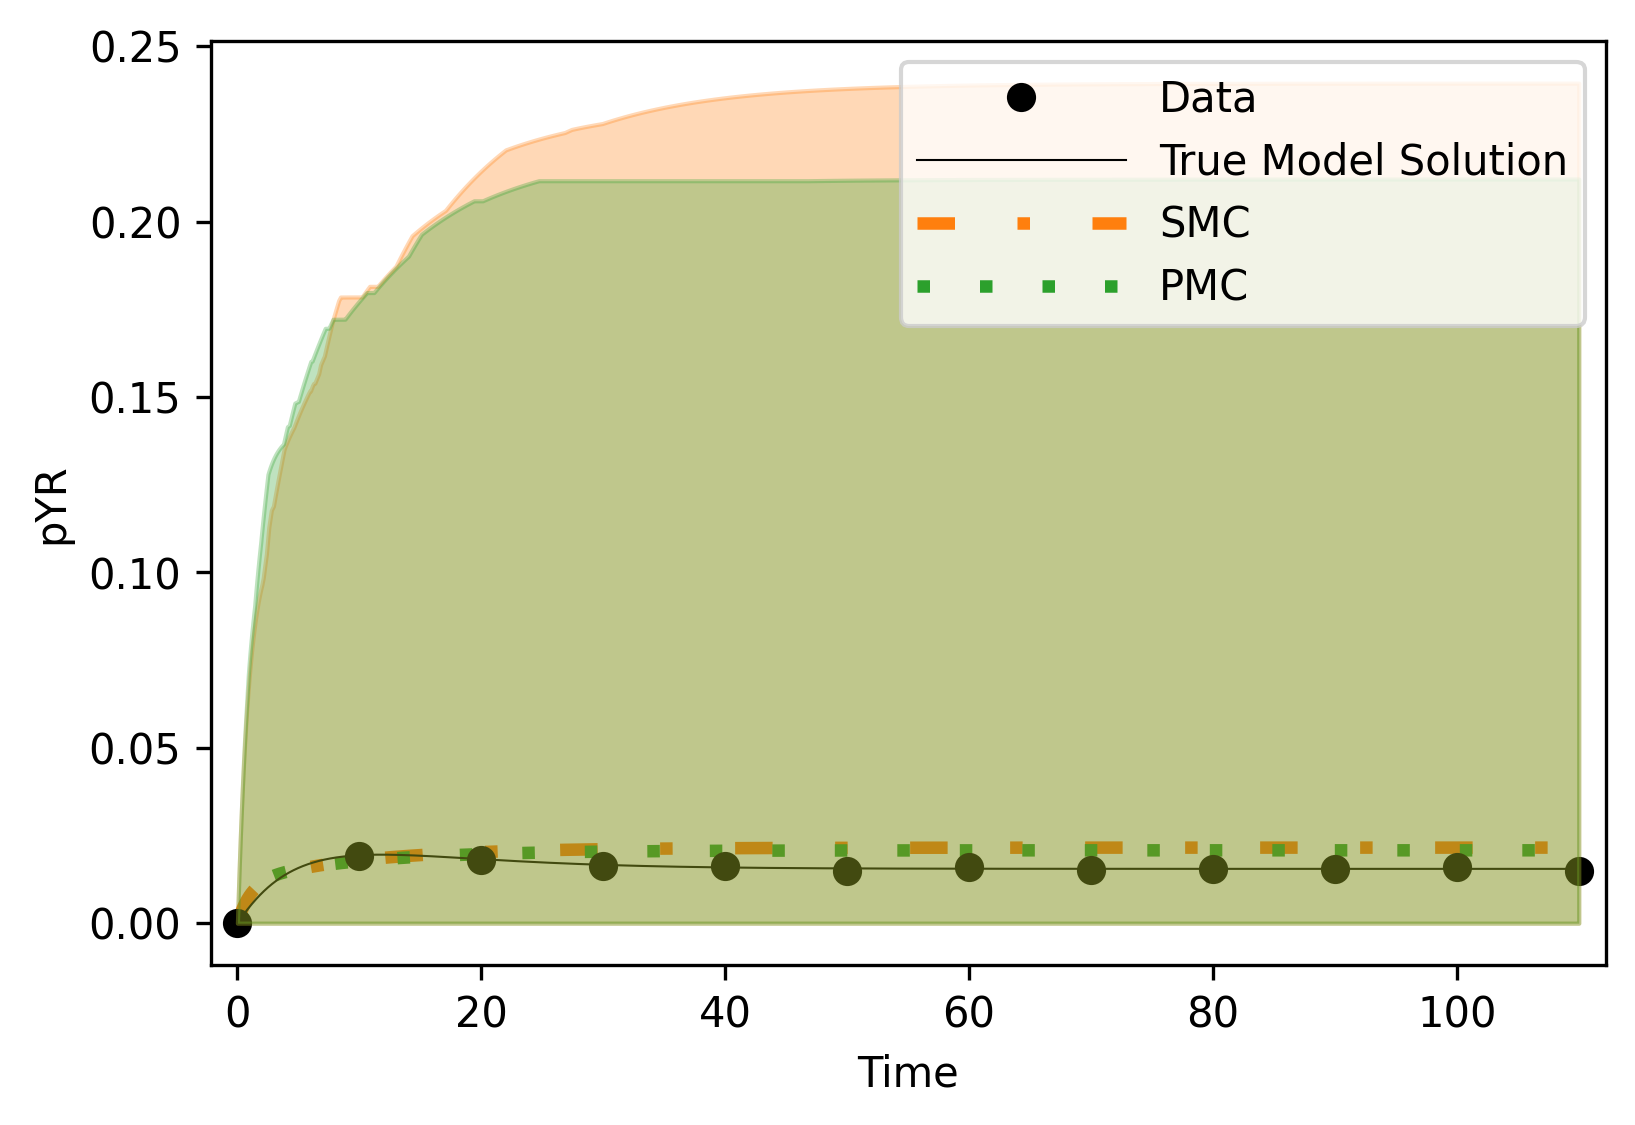

In [15]:
measure_df = petab_prob.measurement_df
plt.figure(figsize=(6,4), dpi=300)
plt.plot(measure_df["time"], measure_df["measurement"], "ko", label="Data", zorder=2)

max_t = np.max(measure_df["time"])
n_sim_ts = int(110*100 + 1)
simu = obj.roadrunner_instance

simu.resetAll()
simu.timeCourseSelections = ["time", "pYR"]
og_sim = simu.simulate(0, 110, n_sim_ts)
plt.plot(og_sim[:, 0], og_sim[:, 1], "k-", lw=0.5, label="True Model Solution")

lss = [(0,(5,10)), (0,(3,5,1,5)), (0,(1,4))]
for i, best in enumerate(best_results):
	if i == 0:
		continue;
	pars = best.posterior_samples
	weights = best.posterior_weights

	all_sim_data = np.empty(shape=(n_sim_ts, pars.shape[0]))

	## Collect all of the runs simulation information
	for n, par in enumerate(pars):
		#sim = obj(par, mode="mode_fun", return_dict=True)["simulation_results"]["simCondition"]
		simu.resetAll()
		for name, x in zip(fit_par_names, par):
			simu[name] = x
		simu.reset()
		simu.timeCourseSelections = ["time", "pYR"]
		sim = simu.simulate(0, 110, n_sim_ts)
		all_sim_data[:, n] = sim[:, 1]
		sim_ts = sim[:, 0]
	n_ts = len(sim_ts)
	mean_sim_data = np.average(all_sim_data, weights=weights, axis=1)
	temp = np.array([weighted_quantile(x, [LOWER_PCT, UPPER_PCT], weights) for x in all_sim_data])
	#print(temp[0])
	low_sim_data = temp[:, 0]
	high_sim_data = temp[:, 1]
	
	plt.plot(sim_ts, mean_sim_data, lw=3, linestyle=lss[i], label=grouped_results[i].abbr, zorder=1, color=colors[i])
	plt.fill_between(sim_ts, low_sim_data, high_sim_data, zorder=3, alpha=0.3, color=colors[i])
plt.legend(handlelength=5, loc="upper right")
plt.margins(x=0.02);
plt.xlabel("Time"); plt.ylabel("pYR");